In [42]:
from google.colab import files
uploaded = files.upload()


Saving hotel_bookings.csv to hotel_bookings.csv


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [44]:
df = pd.read_csv('hotel_bookings.csv')

print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nSummary Statistics:\n", df.describe())


Shape: (119390, 32)

Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object


          Missing Count  Percentage
children              4    0.003350
country             488    0.408744
agent             16340   13.686238
company          112593   94.306893


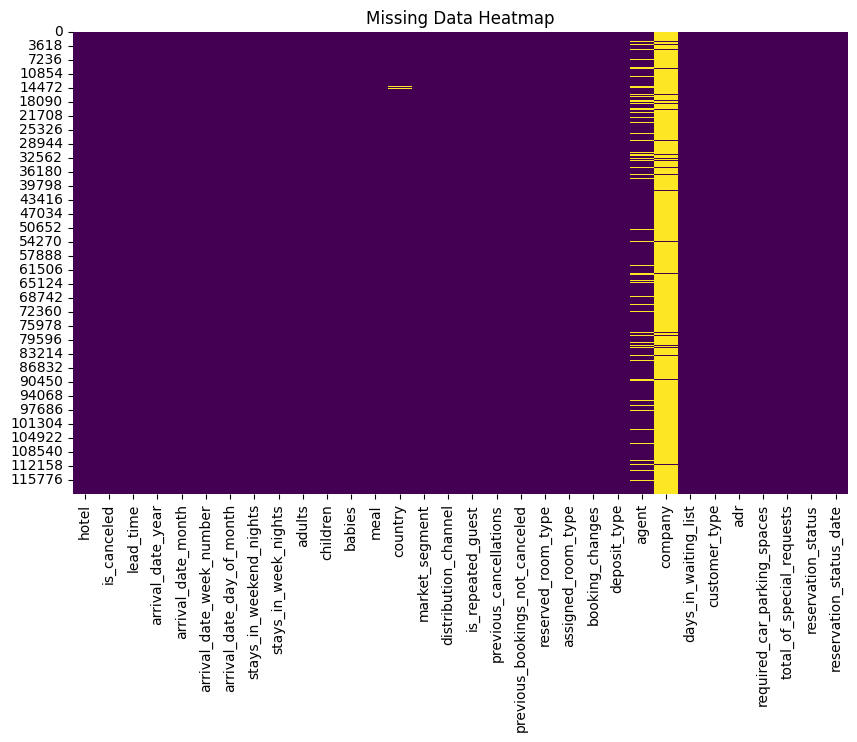

In [45]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0]
print(missing_df)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [46]:
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)



In [47]:
print("Exact Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)



Exact Duplicates: 31994


Duplicate rows: 0


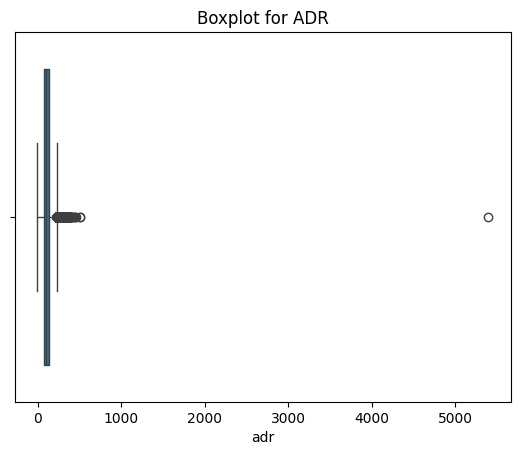

adr
0.00      1778
75.00     1320
65.00     1260
48.00      878
85.00      858
          ... 
92.72        1
200.40       1
372.33       1
78.44        1
93.42        1
Name: count, Length: 8879, dtype: int64


In [49]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Outliers (example for ADR)
sns.boxplot(x=df['adr'])
plt.title("Boxplot for ADR")
plt.show()

# Check inconsistencies
print(df['adr'].value_counts())


Duplicate rows: 0


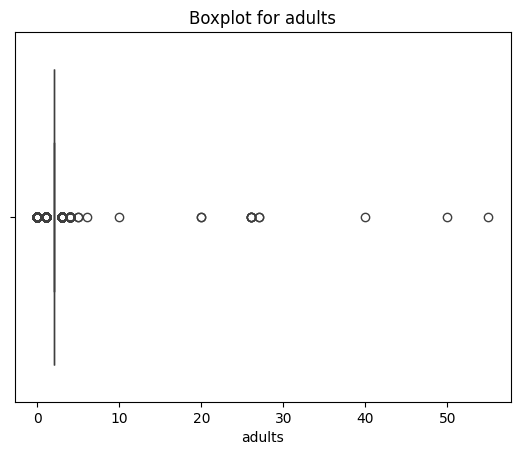

adults
2     64497
1     16503
3      5935
0       385
4        60
26        5
5         2
27        2
20        2
40        1
55        1
50        1
6         1
10        1
Name: count, dtype: int64


In [50]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())


sns.boxplot(x=df['adults'])
plt.title("Boxplot for adults")
plt.show()

# Check inconsistencies
print(df['adults'].value_counts())


In [51]:
def treat_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
              np.where(df[col] < lower, lower, df[col]))

num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'adr']

for col in num_cols:
    treat_outliers(col)


In [52]:
# Impossible guests
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

# Check and convert date if needed
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [53]:
# Total guests > 0
df['total_guests'] = df['adults'] + df['children'] + df['babies']
assert all(df['total_guests'] > 0)

# Valid ranges
print(df['lead_time'].describe())
print(df['adr'].describe())


count    87396.000000
mean        78.363987
std         81.047312
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        296.000000
Name: lead_time, dtype: float64
count    87396.000000
mean       105.344502
std         49.190333
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max        227.000000
Name: adr, dtype: float64


In [54]:
df.to_csv('hotel_bookings_cleaned.csv', index=False)

# Create a data dictionary manually or with code like:
data_dict = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Description': ["Add manual descriptions here..."] * len(df.columns)
})
data_dict.to_csv('data_dictionary.csv', index=False)


In [55]:
print("Exact Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Exact Duplicates: 348


In [56]:
df.to_csv('hotel_bookings_cleaned.csv', index=False)

# Download file
files.download('hotel_bookings_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>